In [1]:
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
from datetime import datetime

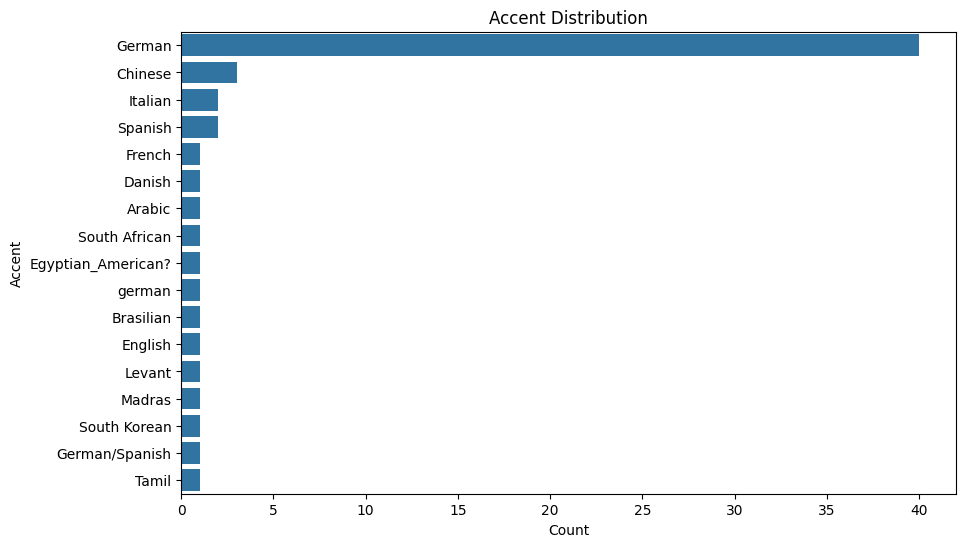

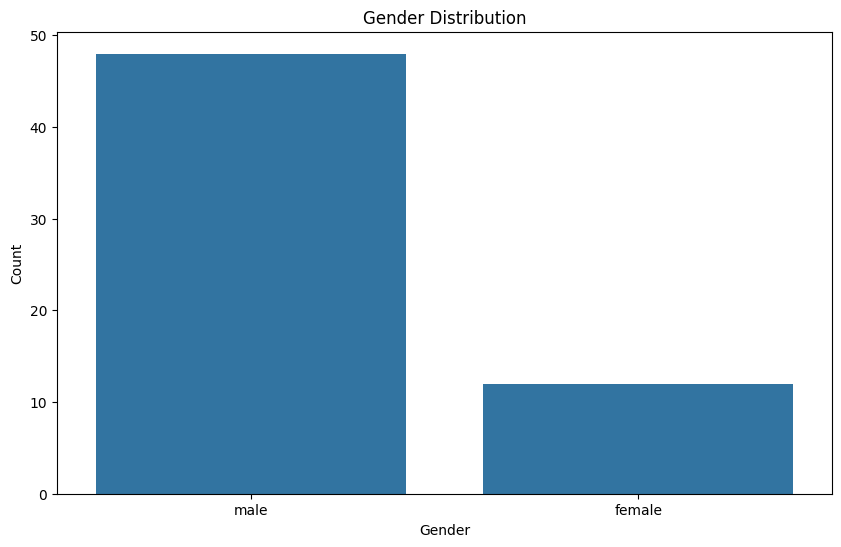

In [2]:
# META OVERVIEW

# Path to your JSON file
file_path = './data/audioMNIST_meta.txt'

with open(file_path, 'r') as file:
    json_data = json.load(file)

df = pd.DataFrame.from_dict(json_data, orient='index')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Accent Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y="accent", data=df, order = df['accent'].value_counts().index)
plt.title('Accent Distribution')
plt.xlabel('Count')
plt.ylabel('Accent')
plt.show()
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="gender", data=df, order = df['gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

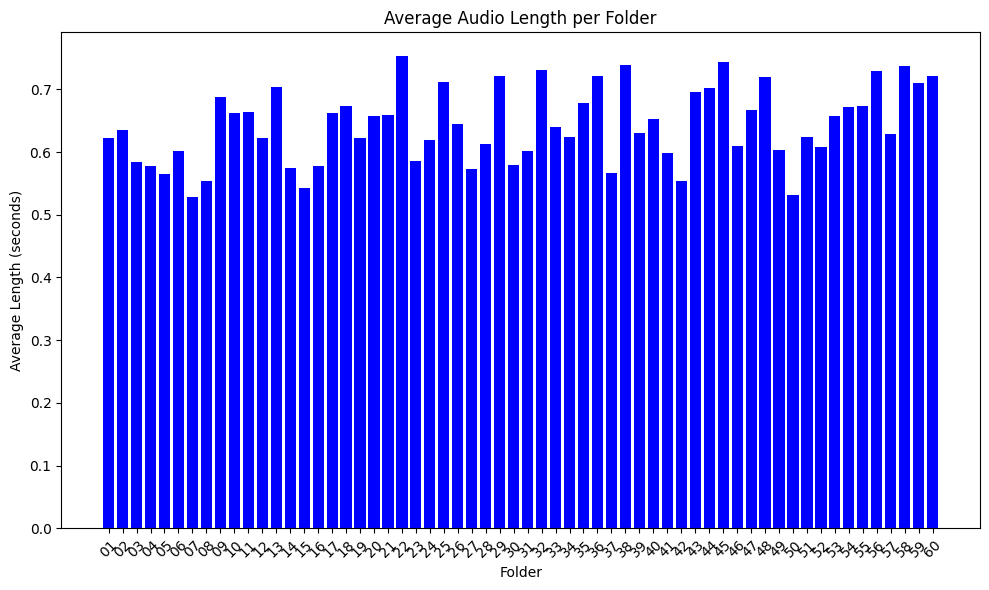

In [3]:
# AVERAGE LENGTH OF AUDIO PER FOLDER

data_dir = 'data'
folder_lengths = {} 

for folder in sorted(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        lengths = [] 
        for filename in os.listdir(folder_path):
            if filename.endswith('.wav'): 
                file_path = os.path.join(folder_path, filename)
                audio, sr = librosa.load(file_path, sr=None)
                lengths.append(len(audio) / sr)

     
        if lengths:
            folder_lengths[folder] = sum(lengths) / len(lengths)



folders = list(folder_lengths.keys())
avg_lengths = list(folder_lengths.values())

plt.figure(figsize=(10, 6))
plt.bar(folders, avg_lengths, color='blue')
plt.xlabel('Folder')
plt.ylabel('Average Length (seconds)')
plt.title('Average Audio Length per Folder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

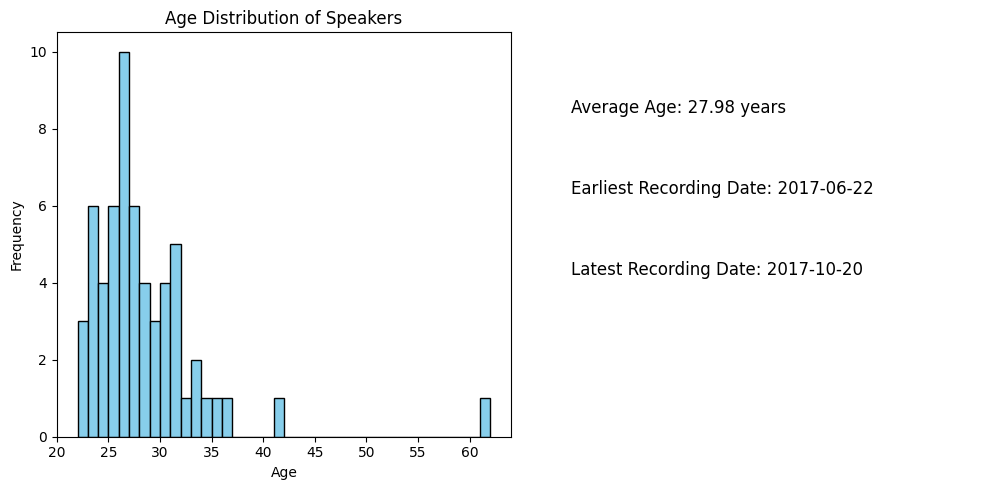

In [5]:
raw_info = """
{
    "01": {
        "accent": "german", 
        "age": 30, 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Wuerzburg", 
        "recordingdate": "17-06-22-11-04-28", 
        "recordingroom": "Kino"
    }, 
    "02": {
        "accent": "German", 
        "age": "25", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Hamburg", 
        "recordingdate": "17-06-26-17-57-29", 
        "recordingroom": "Kino"
    }, 
    "03": {
        "accent": "German", 
        "age": "31", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Bremen", 
        "recordingdate": "17-06-30-17-34-51", 
        "recordingroom": "Kino"
    }, 
    "04": {
        "accent": "German", 
        "age": "23", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Helmstedt", 
        "recordingdate": "17-06-30-18-09-14", 
        "recordingroom": "Kino"
    }, 
    "05": {
        "accent": "German", 
        "age": "25", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Hameln", 
        "recordingdate": "17-07-06-10-53-10", 
        "recordingroom": "Kino"
    }, 
    "06": {
        "accent": "German", 
        "age": "25", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Dortmund", 
        "recordingdate": "17-07-06-11-23-34", 
        "recordingroom": "Kino"
    }, 
    "07": {
        "accent": "German/Spanish", 
        "age": "27", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Spanien, Mallorca", 
        "recordingdate": "17-07-10-17-06-17", 
        "recordingroom": "Kino"
    }, 
    "08": {
        "accent": "German", 
        "age": "41", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Ludwigsfelde", 
        "recordingdate": "17-07-10-17-39-41", 
        "recordingroom": "Kino"
    }, 
    "09": {
        "accent": "South Korean", 
        "age": "35", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Asia, South Korea, Seoul", 
        "recordingdate": "17-07-12-17-03-59", 
        "recordingroom": "Kino"
    }, 
    "10": {
        "accent": "German", 
        "age": "36", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Lemgo", 
        "recordingdate": "17-07-12-17-31-43", 
        "recordingroom": "Kino"
    }, 
    "11": {
        "accent": "German", 
        "age": "33", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-07-12-17-59-59", 
        "recordingroom": "Kino"
    }, 
    "12": {
        "accent": "German", 
        "age": "26", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-07-19-17-05-31", 
        "recordingroom": "Kino"
    },
    "13": {
        "accent": "German", 
        "age": "27", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Freiberg", 
        "recordingdate": "17-07-19-17-47-06", 
        "recordingroom": "Kino"
    }, 
    "14": {
        "accent": "Spanish", 
        "age": "31", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Spain, Oviedo", 
        "recordingdate": "17-07-24-18-08-13", 
        "recordingroom": "Kino"
    }, 
    "15": {
        "accent": "Madras", 
        "age": "28", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, India, Chennai", 
        "recordingdate": "17-07-24-19-06-38", 
        "recordingroom": "Kino"
    }, 
    "16": {
        "accent": "German", 
        "age": "30", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Muenchen", 
        "recordingdate": "17-07-31-17-17-08", 
        "recordingroom": "Kino"
    },
    "17": {
        "accent": "German", 
        "age": "26", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-07-31-18-09-29", 
        "recordingroom": "Kino"
    }, 
    "18": {
        "accent": "Levant", 
        "age": "25", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Syria, Damascus", 
        "recordingdate": "17-08-11-18-38-42", 
        "recordingroom": "Kino"
    }, 
    "19": {
        "accent": "English", 
        "age": "23", 
        "gender": "male", 
        "native speaker": "yes", 
        "origin": "Europe, India, Delhi", 
        "recordingdate": "17-08-11-19-12-12", 
        "recordingroom": "Kino"
    }, 
    "20": {
        "accent": "German", 
        "age": "25", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-08-14-17-27-02", 
        "recordingroom": "Ruheraum"
    }, 
    "21": {
        "accent": "German", 
        "age": "26", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Muenster", 
        "recordingdate": "17-08-14-18-02-37", 
        "recordingroom": "Ruheraum"
    }, 
    "22": {
        "accent": "German", 
        "age": "33", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Braunschweig", 
        "recordingdate": "17-08-15-13-38-24", 
        "recordingroom": "Ruheraum"
    }, 
    "23": {
        "accent": "German", 
        "age": "28", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Alsbach-Haehnlein", 
        "recordingdate": "17-08-16-14-17-44", 
        "recordingroom": "VR-Room"
    }, 
    "24": {
        "accent": "Chinese", 
        "age": "26", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Asia, China, Nanning", 
        "recordingdate": "17-08-16-15-37-02", 
        "recordingroom": "VR-Room"
    }, 
    "25": {
        "accent": "Brasilian", 
        "age": "22", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "South-America, Brazil, Porto Alegre", 
        "recordingdate": "17-08-16-16-01-05", 
        "recordingroom": "VR-Room"
    }, 
    "26": {
        "accent": "Chinese", 
        "age": "22", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Asia, China, Beijing", 
        "recordingdate": "17-08-17-12-20-59", 
        "recordingroom": "library"
    }, 
    "27": {
        "accent": "Italian", 
        "age": "31", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Italy, Morbegno", 
        "recordingdate": "17-08-17-12-50-32", 
        "recordingroom": "library"
    }, 
    "28": {
        "accent": "German", 
        "age": "28", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Hof", 
        "recordingdate": "17-08-17-13-41-24", 
        "recordingroom": "library"
    }, 
    "29": {
        "accent": "German", 
        "age": "23", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Freiburg", 
        "recordingdate": "17-09-14-20-54-30", 
        "recordingroom": "vr-room"
    }, 
    "30": {
        "accent": "German", 
        "age": "28", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Poland, Slubice", 
        "recordingdate": "17-08-17-16-42-41", 
        "recordingroom": "VR-Room"
    }, 
    "31": {
        "accent": "German", 
        "age": "26", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-08-21-11-03-29", 
        "recordingroom": "VR-room"
    }, 
    "32": {
        "accent": "Egyptian_American?", 
        "age": "23", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Africa, Egypt, Alexandria", 
        "recordingdate": "17-08-21-12-44-56", 
        "recordingroom": "VR-room"
    }, 
    "33": {
        "accent": "German", 
        "age": "26", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Hamburg", 
        "recordingdate": "17-08-21-13-12-22", 
        "recordingroom": "vr-room"
    }, 
    "34": {
        "accent": "German", 
        "age": "25", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Munich", 
        "recordingdate": "17-09-01-13-26-49", 
        "recordingroom": "vr-room"
    }, 
    "35": {
        "accent": "Chinese", 
        "age": "24", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Asia, China, Shanghai", 
        "recordingdate": "17-08-21-15-03-12", 
        "recordingroom": "vr-room"
    }, 
    "36": {
        "accent": "German", 
        "age": "22", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-08-31-18-06-03", 
        "recordingroom": "vr-room"
    }, 
    "37": {
        "accent": "Italian", 
        "age": "27", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Italy, Casarsa", 
        "recordingdate": "17-09-01-09-46-46", 
        "recordingroom": "vr-room"
    }, 
    "38": {
        "accent": "Spanish", 
        "age": "32", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Spain, Toledo", 
        "recordingdate": "17-09-01-13-45-16", 
        "recordingroom": "vr-room"
    }, 
    "39": {
        "accent": "German", 
        "age": "29", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-09-01-14-13-15", 
        "recordingroom": "vr-room"
    }, 
    "40": {
        "accent": "German", 
        "age": "26", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-09-01-14-33-44", 
        "recordingroom": "vr-room"
    }, 
    "41": {
        "accent": "South African", 
        "age": "30", 
        "gender": "male", 
        "native speaker": "yes", 
        "origin": "Africa, South Africa, Vryburg", 
        "recordingdate": "17-09-01-14-56-32", 
        "recordingroom": "vr-room"
    }, 
    "42": {
        "accent": "Arabic", 
        "age": "29", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Syria, Damascus", 
        "recordingdate": "17-09-01-15-23-24", 
        "recordingroom": "vr-room"
    }, 
    "43": {
        "accent": "German", 
        "age": "31", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Regensburg", 
        "recordingdate": "17-09-01-16-59-50", 
        "recordingroom": "vr-room"
    }, 
    "44": {
        "accent": "German", 
        "age": "61", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-09-01-17-23-22", 
        "recordingroom": "vr-room"
    }, 
    "45": {
        "accent": "German", 
        "age": "1234", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Stuttgart", 
        "recordingdate": "17-09-11-12-07-04", 
        "recordingroom": "vr-room"
    }, 
    "46": {
        "accent": "German", 
        "age": "30", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Vechta", 
        "recordingdate": "17-09-11-13-59-04", 
        "recordingroom": "vr-room"
    }, 
    "47": {
        "accent": "Danish", 
        "age": "23", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Europe, Denmark, Copenhagen", 
        "recordingdate": "17-09-11-14-33-03", 
        "recordingroom": "vr-room"
    }, 
    "48": {
        "accent": "German", 
        "age": "26", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-09-11-15-05-58", 
        "recordingroom": "vr-room"
    }, 
    "49": {
        "accent": "German", 
        "age": "26", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-09-12-14-50-32", 
        "recordingroom": "vr-room"
    }, 
    "50": {
        "accent": "German", 
        "age": "24", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Flensburg", 
        "recordingdate": "17-09-12-18-25-00", 
        "recordingroom": "vr-room"
    }, 
    "51": {
        "accent": "German", 
        "age": "26", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Bremen", 
        "recordingdate": "17-09-13-09-33-15", 
        "recordingroom": "vr-room"
    }, 
    "52": {
        "accent": "French", 
        "age": "34", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Europe, France, Montpellier", 
        "recordingdate": "17-09-13-10-32-26", 
        "recordingroom": "vr-romm"
    }, 
    "53": {
        "accent": "German", 
        "age": "24", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Reutlingen", 
        "recordingdate": "17-09-13-10-58-47", 
        "recordingroom": "vr-room"
    }, 
    "54": {
        "accent": "German", 
        "age": "27", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-09-13-12-13-44", 
        "recordingroom": "vr-room"
    }, 
    "55": {
        "accent": "German", 
        "age": "23", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Dresden", 
        "recordingdate": "17-09-13-12-35-54", 
        "recordingroom": "vr-room"
    }, 
    "56": {
        "accent": "German", 
        "age": "24", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Muenster", 
        "recordingdate": "17-09-14-13-09-37", 
        "recordingroom": "vr-room"
    }, 
    "57": {
        "accent": "German", 
        "age": "27", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-09-15-13-21-33", 
        "recordingroom": "vr-room"
    },
    "58": {
        "accent": "German", 
        "age": "29", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-10-19-20-35-42", 
        "recordingroom": "vr-room"
    }, 
    "59": {
        "accent": "German", 
        "age": "31", 
        "gender": "female", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Berlin", 
        "recordingdate": "17-10-19-21-03-53", 
        "recordingroom": "vr-room"
    }, 
    "60": {
        "accent": "Tamil", 
        "age": "27", 
        "gender": "female", 
        "native speaker": "yes", 
        "origin": "Asia, India, Chennai", 
        "recordingdate": "17-10-20-17-24-39", 
        "recordingroom": "vr-room"
    }
}
"""
# Load JSON data
data = json.loads(raw_info)

# Initialize lists for ages and recording dates
ages = []
recording_dates = []

# Iterate over each entry to extract ages and recording dates
for key, info in data.items():
    # Convert age to int if it's a string and skip if age is unreasonably high (like 1234)
    try:
        age = int(info['age'])
        if age < 100:  # Filter out unrealistic ages
            ages.append(age)
    except ValueError:
        continue
    
    # Convert recording date to datetime object
    try:
        date_str = info['recordingdate']
        recording_date = datetime.strptime(date_str, '%y-%m-%d-%H-%M-%S')
        recording_dates.append(recording_date)
    except ValueError:
        continue

# Compute average age
average_age = sum(ages) / len(ages) if ages else None

# Find earliest and latest recording dates
earliest_date = min(recording_dates) if recording_dates else None
latest_date = max(recording_dates) if recording_dates else None

# Plotting
plt.figure(figsize=(10, 5))

# Age distribution
plt.subplot(1, 2, 1)
plt.hist(ages, bins=range(min(ages), max(ages) + 2), color='skyblue', edgecolor='black')
plt.title('Age Distribution of Speakers')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Annotations for average age and recording dates
plt.subplot(1, 2, 2)
plt.text(0.1, 0.8, f'Average Age: {average_age:.2f} years', fontsize=12)
plt.text(0.1, 0.6, f'Earliest Recording Date: {earliest_date.strftime("%Y-%m-%d")}', fontsize=12)
plt.text(0.1, 0.4, f'Latest Recording Date: {latest_date.strftime("%Y-%m-%d")}', fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()